In [ ]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy import signal
from scipy import periodogram
import matplotlib.colors as mcolors

## Short-term activity of of one spider

Before proceding with this notebook, pleasse read carefully following Chapters  of [Practical Time Series Analysis](https://wlu.primo.exlibrisgroup.com/discovery/fulldisplay?docid=alma991010535657904161&context=L&vid=01WLU_INST:01WLU&lang=en&search_scope=MyInst_and_CI&adaptor=Local%20Search%20Engine&tab=Everything&query=any,contains,%20Time%20series%20analysis&mode=Basic). 
 - Introduction to Time series
 - Different types of Data
 - Cross-Sectional Data
 - Time Series Data
 - Pannel Data
 - Internal Strucures of Time Series
 - Models of Time Series

Make sure to reproduce all of the Python code developed in this chapter.

Open file **Practice 1_data1.csv** in MS. Excel. It should have has two columns (see image below). The first column list time (hours:minutes:seconds) and the second contains number of UV light crossing for the spider *s2*. We will use this number of crossings as a measure of activity for a spider

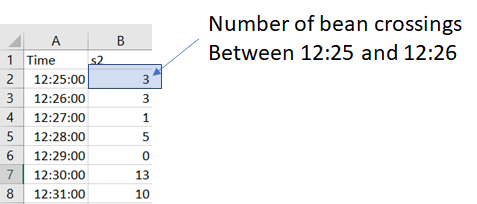

## Experiment 1: Plot activity vs time

Import data from **Week1_data1.csv** into a datafraem **df1**.Plot time on x-axis and activity(number of bean crossings) on the y-axis. Clearly label the axis

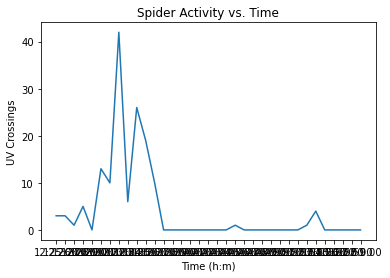

In [11]:
df1 = pd.read_csv('Practice 1_data1.csv')
plt.plot(df1['Time'], df1['s2'])
plt.xlabel("Time (h:m)")
plt.ylabel("UV Crossings")
plt.title("Spider Activity vs. Time")
plt.show()

### Conclusion 1:

*In the cell below please provide brief and informative description of spider activity. Is spider behavior varies at differnt time of day? What aspect of the graph enable you to make such observation? Is this graph an ideal representation of locomotor activity? How you can make it better?*

##### Spider activity varies greatly throughout the day, with a peak of UV crossings at around 12:30. A better way to visualize this data may be by ignoring the hours ( since it doesn't matter for this dataset - all activity is recorded within one hour ) or spacing out the labels on the bottom so they can be read more clearly. 

## Experiment 2: Short-term activity of of three spiders

Open file **Week1_data2.csv**. It has similar activity but for two spiders. Plot time series of two spiders in different colors on the same plot. Add a clear legend to distinguish between the spiders. 

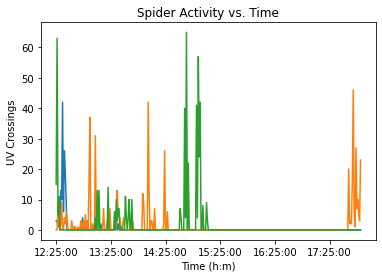

In [13]:
df2 = pd.read_csv('Practice 1_data2.csv')
plt.plot(df2['Time'], df2['s2'], label = "Spider 2")
plt.plot(df2['Time'], df2['s5'], label = "Spider 5")
plt.plot(df2['Time'], df2['s6'], label = "Spider 6")
plt.xlabel("Time (h:m)")
plt.ylabel("UV Crossings")
plt.title("Spider Activity vs. Time")
plt.xticks(range(0, 336, 60))
plt.show()

### Conclusion2:

*Briefly compare activity of two spiders. Do you think one of the spiders is more active than the other? What aspect of the graph enable you to reach this conclusion? Can visualization be improved to highlight the comparison?*

##### It depends on how you define "more active" - it seems that the spider in green (for whatever reason it won't print the legend in the notebook) has peaks of higher activity but less continuous activity over time, while the spider highlighted in orange has peaks that are not as high but is more active continuously. 

## Experiment 3: Quantify activity of two spiders

In science visual observation is not enought to reach the conclusion. In this experiment you can use your creativity and background on scientific experimentation to conduct QUANTITATIVE analysis of animal behavior. Conduct informative quantitative ananlysis supported by visualizaiton to provide comparison of locomotive behavior in two spiders.  In the space below please compose a brief report on this comparative analysis. Your report should include
 -  Biological rational on locomotive behavior of insects (or spiders if you can have one). 
     - You should use at least 3 peer-review sources
 -  Brief description of the methods for data scollection using [LAM25 monitor](https://trikinetics.com/Downloads/LAM25%20Data%20Sheet.pdf)
 - An optimal visualization of locomotor activity of two spiders
 - Quantitative comparison of locomotor activity with tables and/or visualization
 - Your interpretation of table/visualization above
 - Conclusion section where you logically explain the similarity/differences among two spiders

##### Generally, the endogenous circadian rhythm of an organism is indicated by the frequency of its activity at a given period of lightness/darkness (Jones et al., 2018). Because of this, understanding what other factors may affect the frequency of locomotive behavior is crucial. The locomotive behavior of spiders is affected by several variables, including species and sex. The species of the spider can greatly affect both circadian rhythm locomotive behavior. Although most spiders that have been researched conform to a ~ 24 hour rhythm, there have been three species studied so far that were found to have a highly variable endogenous clock (Mah, Ayoub, et al., 2020). More research should be done to explore this variability. Another factor that may cause intraspecies variation is the sex of the spider. When two species of spider’s locomotor activity across time was observed (Carrhotus xanthogramma and Philodromus cespitum), there were significant differences within each species depending on the sex of the spider (Mezofi et al., 2019). Both sexes of C. xanthogramma had a mean activity peak in the morning, but females were more active than males. In contrast, the activity of female and male Ph. cespitum spiders followed drastically different schedules, with female activity peaking late in the night and male activity peaking early in the morning (Mezofi et al., 2019). Not only is this evidence that there is variation in activity for some spiders depending on sex, but also that this variation can manifest in different ways.

##### The LAM25 monitor helps record accurate data on the locomotor activity of an organism under study. It works with several rows of tubes, each tube containing an organism, and an array of infrared beams that bisect each tube. When the organism crosses the beam, the time of crossing and number of crossings are recorded. This process allows us to understand what periods the spiders are most active. 

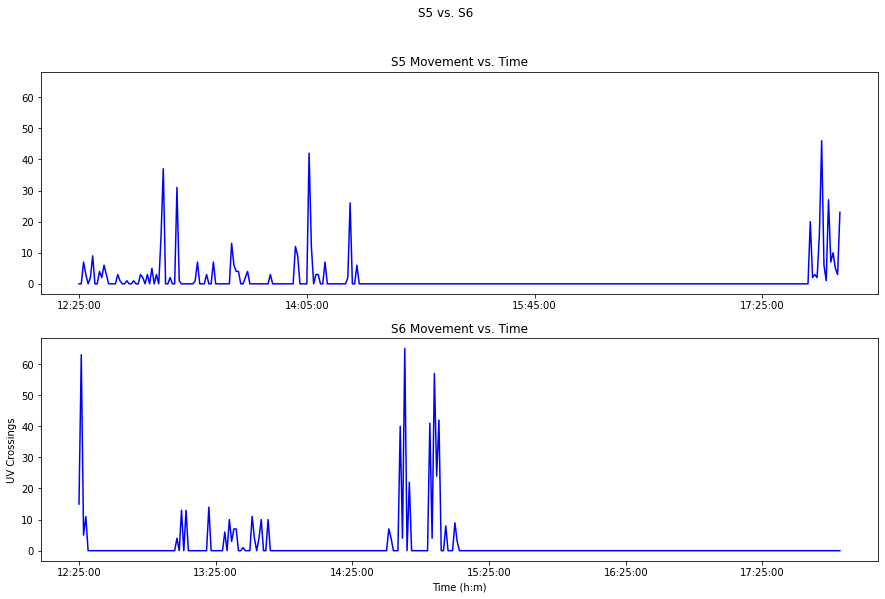

In [36]:
#Optimal visualizations of spider activity 
fig, axs = plt.subplots(2, 1, figsize =(15,9), sharey=True)
plt.setp(axs, xticks=[0,100,200,300],
        yticks=[0, 10, 20, 30, 40, 50, 60])
fig.suptitle('S5 vs. S6')
axs[0].plot(df2['Time'], df2['s5'], color = 'b')
axs[0].set_title('S5 Movement vs. Time')
axs[1].plot(df2['Time'], df2['s6'], color = 'b')
axs[1].set_title('S6 Movement vs. Time')
plt.xlabel("Time (h:m)")
plt.ylabel("UV Crossings")
plt.xticks(range(0, 336, 60))
plt.show()

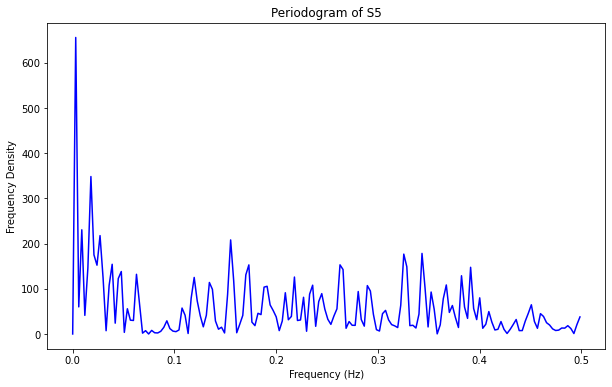

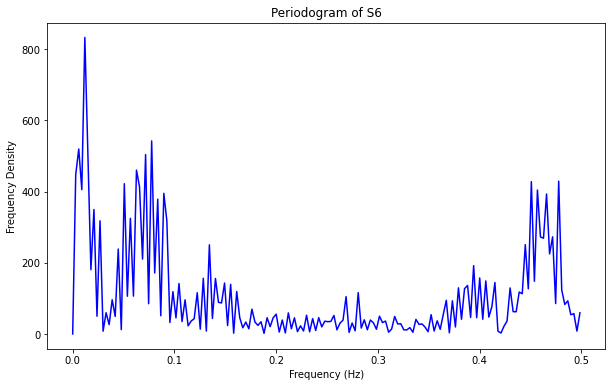

In [50]:
#Periodogram 
frequencies, power_density = signal.periodogram(df2['s5'])
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power_density, color='blue')
plt.title('Periodogram of S5')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Frequency Density')
plt.show()

frequencies, power_density = signal.periodogram(df2['s6'])
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power_density, color='blue')
plt.title('Periodogram of S6')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Frequency Density')
plt.show()

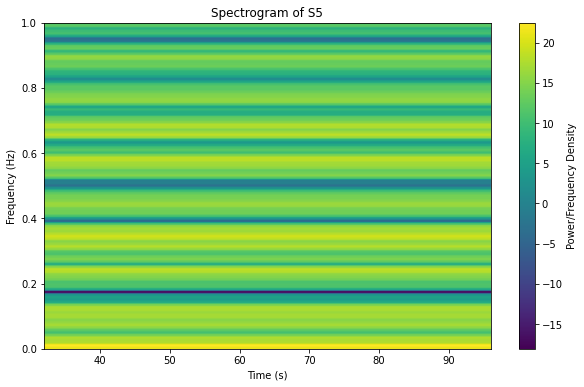

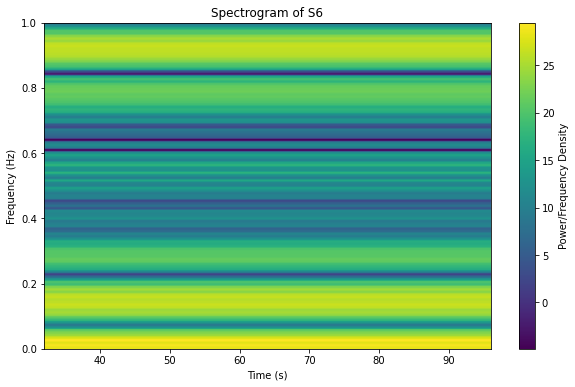

In [63]:
#Spectrogram 

plt.figure(figsize=(10, 6))
plt.specgram(df2['s5']) 
plt.title('Spectrogram of S5')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power/Frequency Density')
plt.show()

plt.figure(figsize=(10, 6))
plt.specgram(df2['s6']) 
plt.title('Spectrogram of S6')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power/Frequency Density')
plt.show()

In [72]:
new_df = df2[['Time', 's5', 's6']].copy()
display(new_df)

,Time,s5,s6
0,12:25:00,0,15
1,12:26:00,0,63
2,12:27:00,7,5
3,12:28:00,3,11
4,12:29:00,0,0
...,...,...,...
330,17:55:00,7,0
331,17:56:00,10,0
332,17:57:00,5,0
333,17:58:00,3,0


##### According to the visualizations of the data that I produced, it appears that the activity of the two spiders does not follow a pattern, or at least not a pattern between the two spiders. Not only are the spiders active at different times, S5 has higher peaks of activity. In conclusion, the activity of the two spiders does not seem to follow a pattern.